## Mental Health and Social Media Consumption - STA141B Final Project


### Group members:
    Samir Cochinwala
    Zain Khalid
    Sriram Subramanian
    Russell Chien

## Table of Contents

0. Imports
1. Introduction
2. Cleaning Dataset
2. Statistical Visualization
3. NLP analysis 
4. API / Web Scraping > we can do something similar to hw4 where we filter out meaningless words and find some sort of significance through sentences
5. Regression / KNN / random forest / and other models
6. Conclusion / Results

### Imports

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Introduction

In 2023, you have 5 year olds who use iPhones, iPads, computers, etc. for multiple hours everyday. On top of this, being aware of your own mental health isn't particularly common. Our day to day lives consist of staring at Instagram, Facebook, Tiktok, etc. But how often do you hear about someone who journals about their feelings, for example. Our motivation behind this project came by reflecting on our daily rituals. We learned that we all woke up and checked our phones, we learned that our study breaks consisted of social media consumption. But we didn't know the impact this had on us. Although social media is a great method of obtaining information in the world, we believe it comes with effects that change your mental health. Social media consumption is extremely high relative to the past. According to: https://www.smartinsights.com/social-media-marketing/social-media-strategy/new-global-social-media-research/#:~:text=The%20number%20of%20social%20media,growth%20of%20%2B137%20million%20users there is a 10% growth YOY of global social media consumption. At first glance, you might think nothing of it, but our projects goal is to reveal the effect social media has on mental health. We will try to find the optimal amount of social media consumption per day as well as clarify the impacts social media has on ones mental health. The goal for this project is to learn about the correlation between social media and mental health and to make people of every age group aware.

### Raw Dataset Rundown

The dataset below is taken from a survey during COVID-19 and was performed in numerous different cities in China. There were multiple questions asked about family relationships, levels of boredom, the epidemic, social media consumption, and mental health states. The dataset contains 917 rows with 88 columns. This meaning there were 917 people who were surveyed and each asked ~88 questions. By analyzing social media consumption and mental health responses we will predict what level/types of social media are healthy. 

In [42]:
import pandas as pd

df = pd.read_excel('/Users/russe/Desktop/code/STA141B/DATA_Media_Use_and_Mental_Health_During_COVID-19_1.xlsx')
df = df.rename(columns={'familymebers': 'familymembers'})
print(df.head())
print(df.columns)

   familymembers location  infection  effect  familyreunion  \
0              3  Tianjin          0       4              1   
1              4    Gansu          0       4              1   
2              3    Hunan          0       4              1   
3              4   Shanxi          0       3              1   
4              4   Shanxi          0       4              1   

   familyrelationship  post  search  boredom1  boredom2  ...  NA  DA  ML  DEP  \
0                   5     1       2         6         6  ...  24  16  24   10   
1                   4     1       4         6         6  ...  19  14  27    7   
2                   4     0       4         1         1  ...  15   6  20    8   
3                   4     1       4         5         5  ...  21  16  22    9   
4                   4     0       4         7         7  ...  30  17  23   10   

   ANX  STR  NEW  TRA  EMP  SYM  
0   13   15    4    1    8    6  
1    7    9   36    0    8   10  
2   10   10    2    1    5    8 

### Heatmap



Using seaborn, we can create a heatmap to visualize the correlation between numeric variables in our dataset. With our heatmap, we can clearly see which variables have a high correlation with each other. Specifically, we can see that there is a high correlation between Death Anxiety and Empathy and Negative Affect and Empathy. Some other interesting observations include that those who saw a positive affect in the pandemic also scored their meaning of life questions higher. 

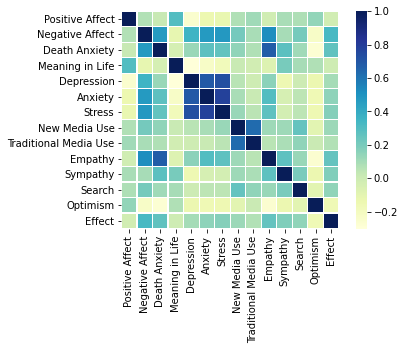

In [49]:
df = df.rename(columns={'PA': 'Positive Affect', 'NA': 'Negative Affect', 'DA': 'Death Anxiety', 'ML': 'Meaning in Life', 
                        'DEP': 'Depression', 'ANX': 'Anxiety', 'STR': 'Stress', 'NEW': 'New Media Use', 
                        'TRA': 'Traditional Media Use', 'EMP': 'Empathy', 'SYM': 'Sympathy', 'search': 'Search', 
                        'optimism': 'Optimism', 'effect': 'Effect'})
heatmap = df[['Positive Affect', 'Negative Affect', 'Death Anxiety', 'Meaning in Life', 'Depression', 'Anxiety', 'Stress', 
              'New Media Use', 'Traditional Media Use', 'Empathy', 'Sympathy', 'Search', 'Optimism', 'Effect']] 
corrMatrix = heatmap.corr()
sns.heatmap(corrMatrix, cmap="YlGnBu", linewidths=.1, square=True)
plt.show()

Categorial variables: family renuion, post
    

### Scatterplot

We created scatterplots to look for correlation between searching social media and its positive/negative affect it had on users. There seemed to be a even distribution amongst all levels. The dominant answer to the question "Did you actively search for updates on epidemic-related news", was '4' (everyday), which clearly shows the importance of social media 

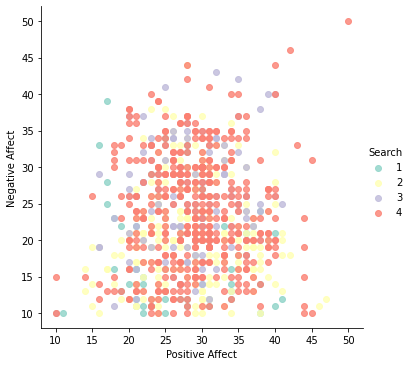

In [52]:
search_df = df[["Positive Affect","Negative Affect","Search"]]
sns.lmplot(x='Positive Affect', y='Negative Affect', data = search_df, hue='Search', fit_reg=False, palette="Set3")